In [1]:
%matplotlib notebook
from scripts.open_spec import *
from scripts.map_tool import *
from scripts.xas_process import XASProcess
from scripts.map_binned import *

file_directory = get_abs_path("data/R2_roots.dat")
temp = get_diff_scan(file_directory)

File is at:  C:\Users\hanr\GitHub\SGMPy\data/R2_roots.dat
C Scan:  [] 

A Scan:  [] 

C Mesh Scan:  [1, 2, 3] 

Mesh Scan:  [] 



In [2]:
open_one_cmesh = OpenSingleCMesh()
map_process_para = open_one_cmesh.open_sgm_map(file_directory, scan_num = 1)
map_process_para.set_x_bin_num(150)
map_process_para.set_y_bin_num(200)

# map_process_para = MapProcessPara(x_start_energy = 1.29, x_end_energy = 1.81, x_bin_num = 50, y_start_energy = 2.39, y_end_energy = 2.91, y_bin_num = 50)

process_map = MapProcess(open_one_cmesh, map_process_para)
process_map.process_map()

export_map = ExportMapData(process_map)
export_map.export_binned_data()

Opening scan 1
in C:\Users\hanr\GitHub\SGMPy\data/R2_roots.dat
cmesh hex_xp 4.5 1 10 hex_yp -2 2 200 0
Parsing MCAs
Done!
Start creating grids
Creating grid completed
(0, 1, 'is empty')
(0, 3, 'is empty')
(0, 5, 'is empty')
(0, 7, 'is empty')
(0, 9, 'is empty')
(0, 11, 'is empty')
(0, 13, 'is empty')
(0, 15, 'is empty')
(0, 17, 'is empty')
(0, 19, 'is empty')
(0, 21, 'is empty')
(0, 23, 'is empty')
(0, 25, 'is empty')
(0, 27, 'is empty')
(0, 29, 'is empty')
(0, 31, 'is empty')
(0, 33, 'is empty')
(0, 35, 'is empty')
(0, 37, 'is empty')
(0, 39, 'is empty')
(0, 41, 'is empty')
(0, 43, 'is empty')
(0, 45, 'is empty')
(0, 47, 'is empty')
(0, 49, 'is empty')
(0, 51, 'is empty')
(0, 53, 'is empty')
(0, 55, 'is empty')
(0, 57, 'is empty')
(0, 59, 'is empty')
(0, 61, 'is empty')
(0, 63, 'is empty')
(0, 65, 'is empty')
(0, 67, 'is empty')
(0, 69, 'is empty')
(0, 71, 'is empty')
(0, 73, 'is empty')
(0, 75, 'is empty')
(0, 77, 'is empty')
(0, 79, 'is empty')
(0, 81, 'is empty')
(0, 83, 'is empty'

<IPython.core.display.Javascript object>


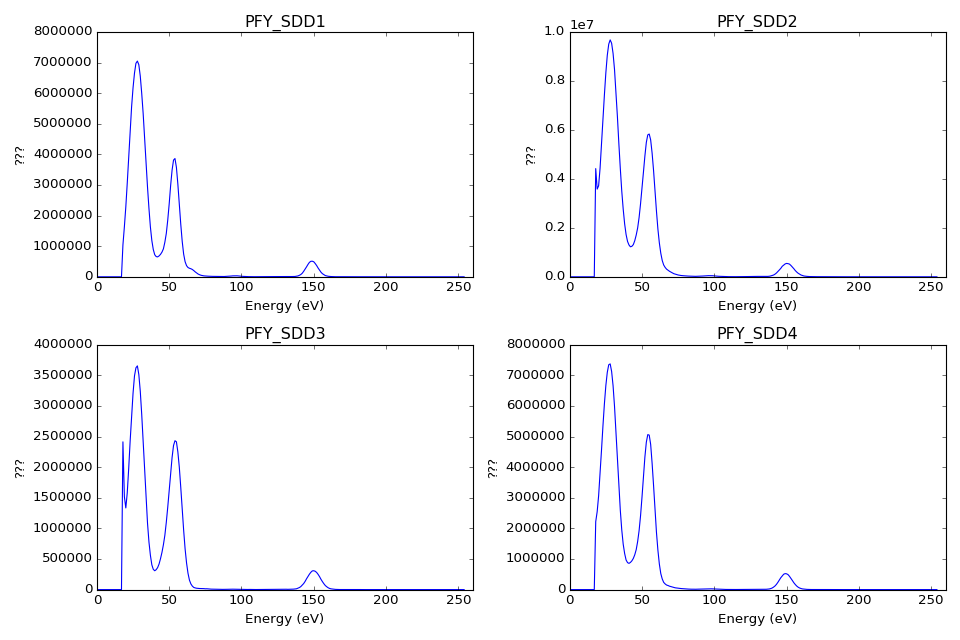

In [4]:
single_map = SingleMap(open_one_cmesh)
single_map.plot_xrf()

<IPython.core.display.Javascript object>


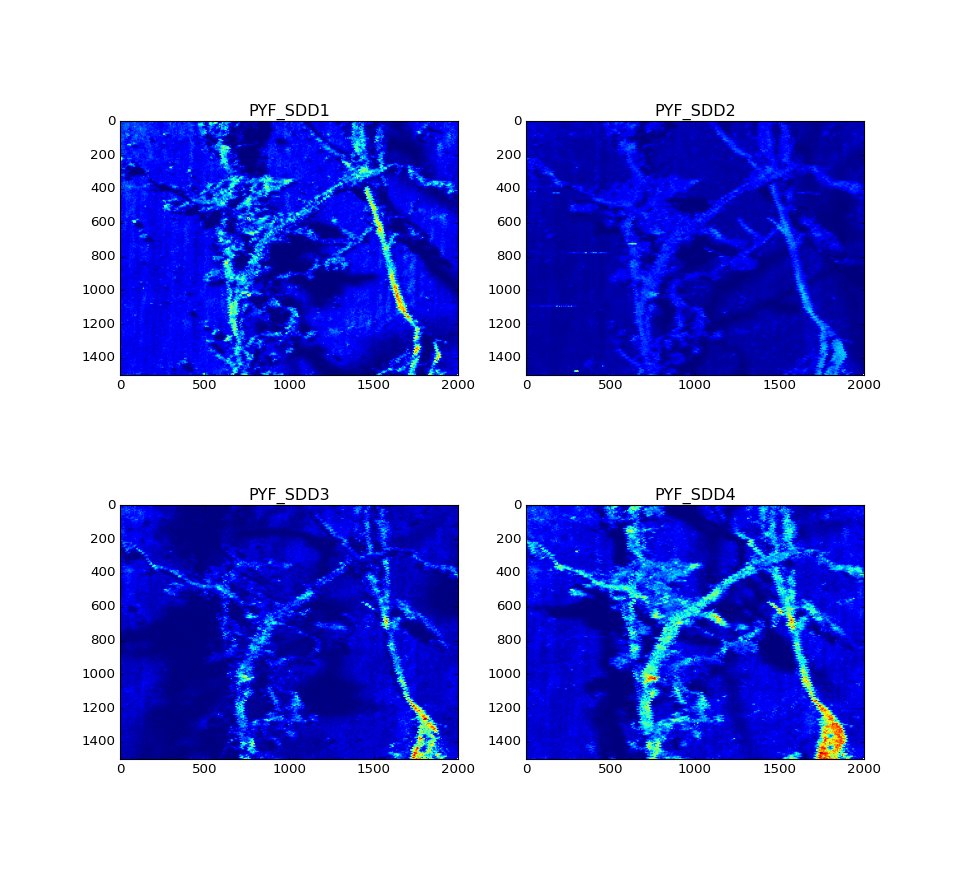

Interpolating MCA1
Done.
Interpolating MCA2
Done.
Interpolating MCA3
Done.
Interpolating MCA4
Done.
C:\Users\hanr\GitHub\SGMPy\data/R2_roots_1_2_pfy_sdd1.tiff
C:\Users\hanr\GitHub\SGMPy\data/R2_roots_1_3_pfy_sdd1.tiff


In [5]:
single_map.calculate_pfy(enStart = 0, enStop = 40)
matplotlib.rcParams['figure.figsize'] = (12, 11)
single_map.plotpfyGrid(file_directory, 2000, 1500, 0.5)